In [3]:
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np
import math

In [1]:
def newtonsMethod(a, c, T, y, b, x):
    l = [x]
    for i in range(100):
        xn = l[-1]
        f = -xn+(-a*(xn**3/3-xn)+a*((-xn+c)*T+y)/(1+b*T))*T+x
        g = -1+a*T*(-T/(b*T+1)-xn**2+1)
        l.append(l[-1] - f/g)
    return l[-1]


/tmp/ipykernel_61137/952578308.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


KeyboardInterrupt: 

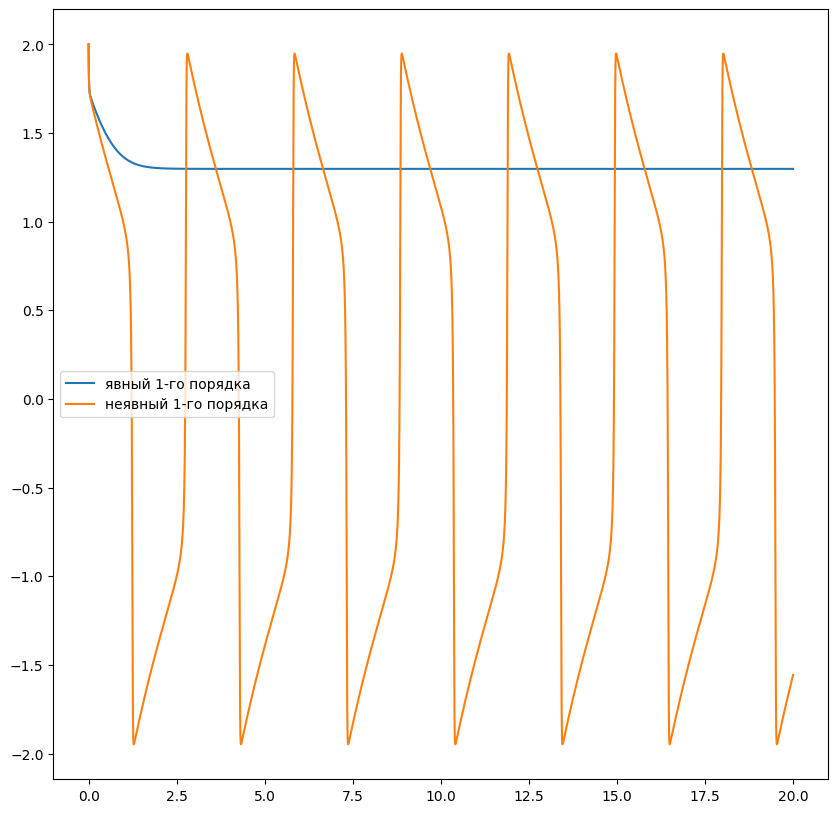

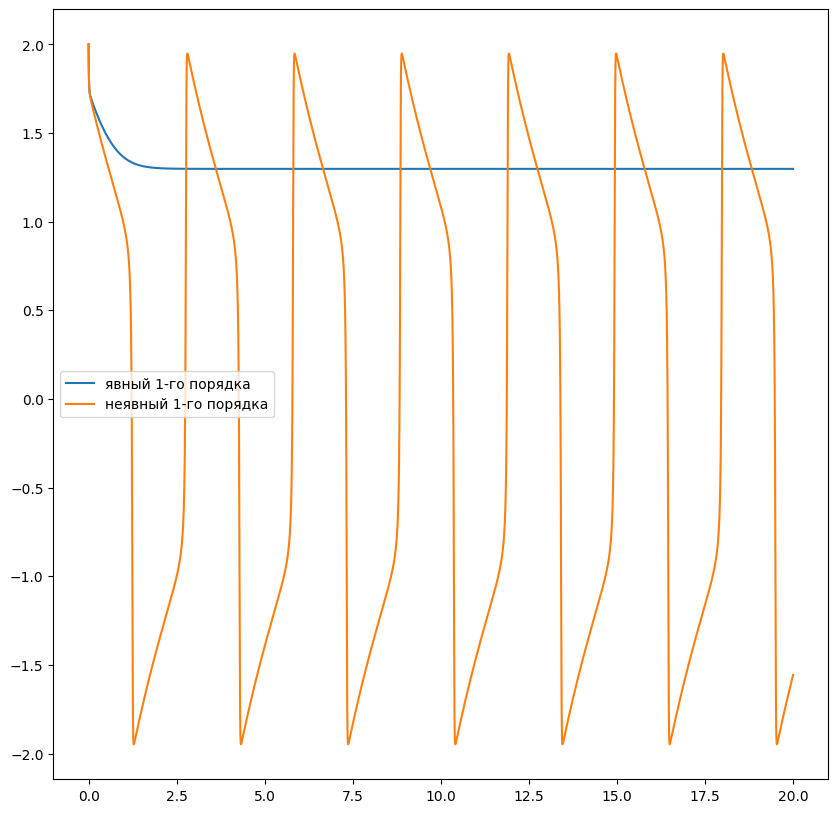

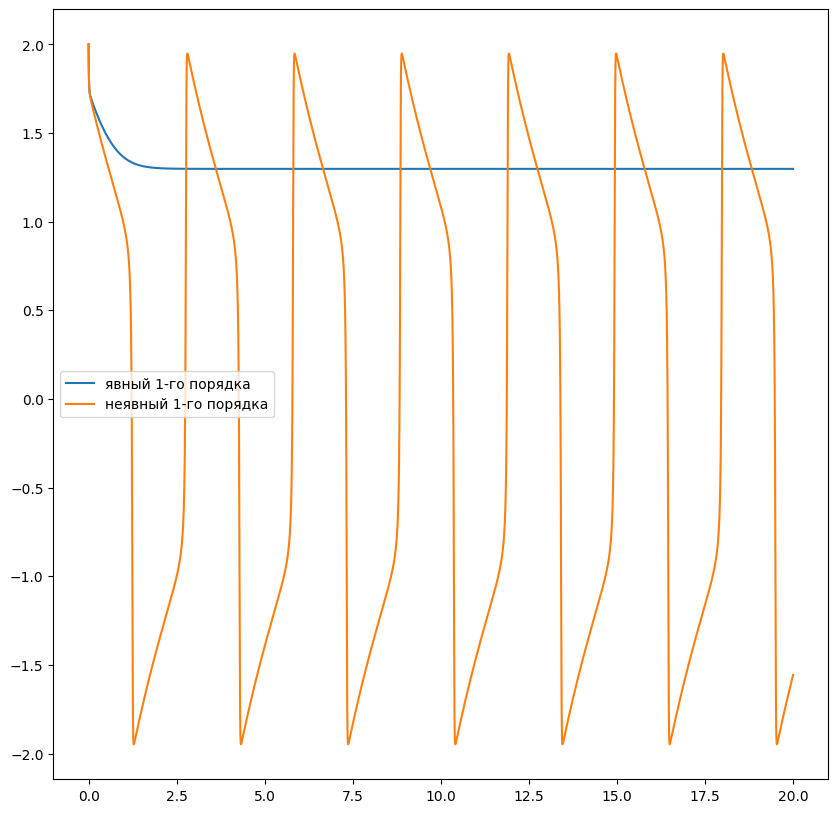

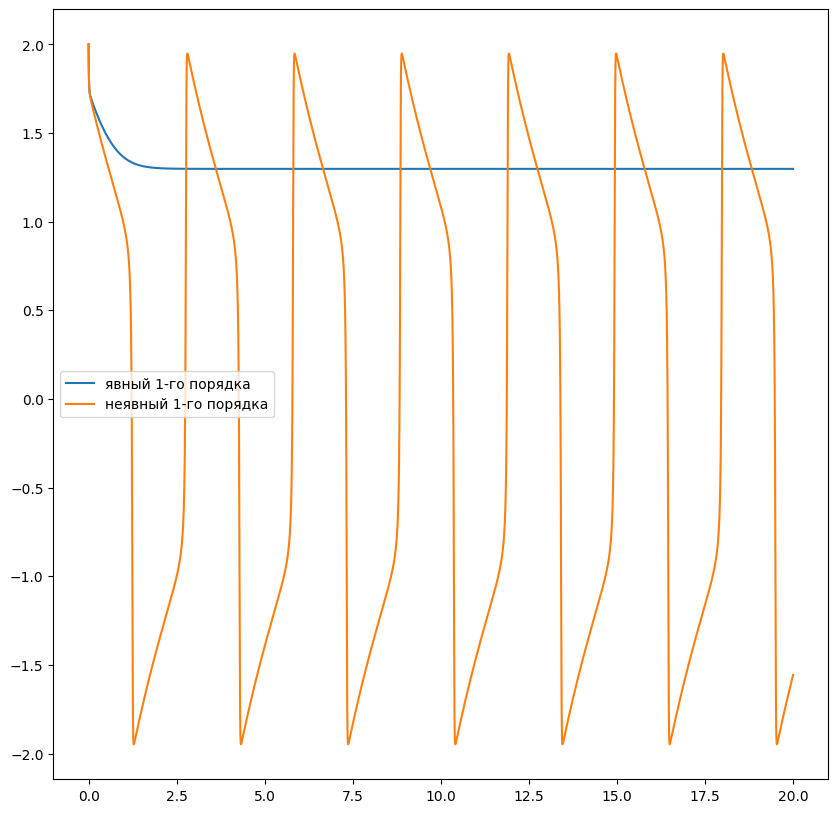

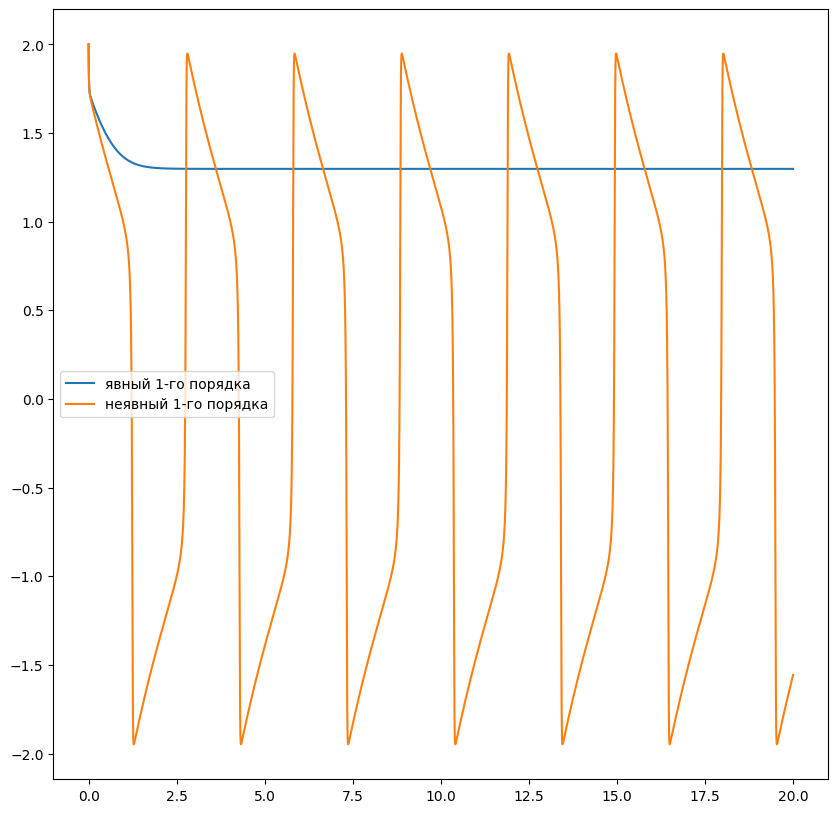

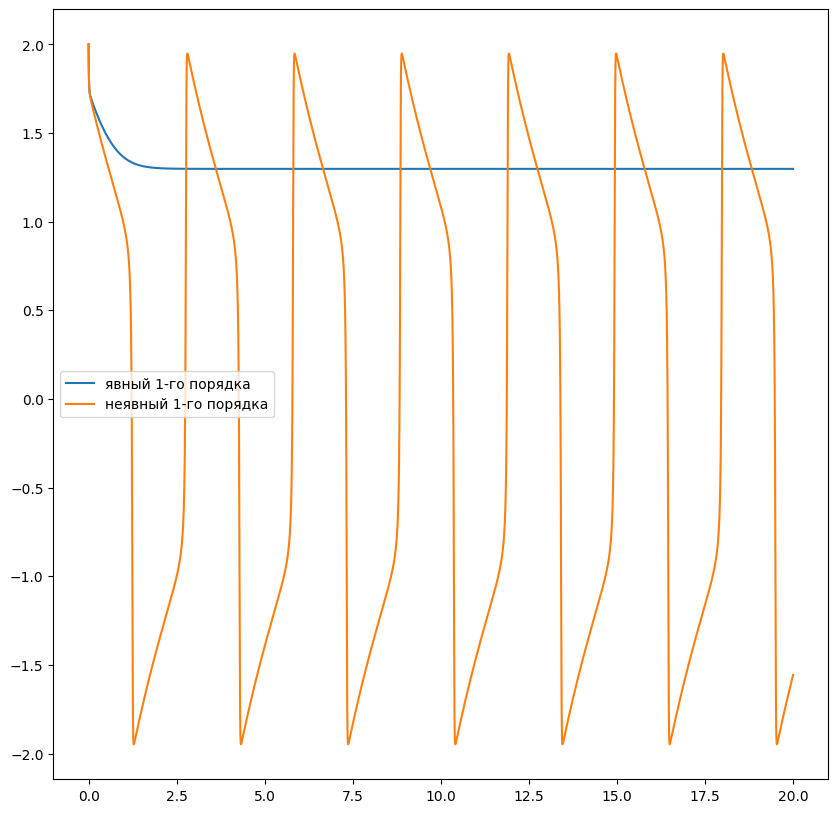

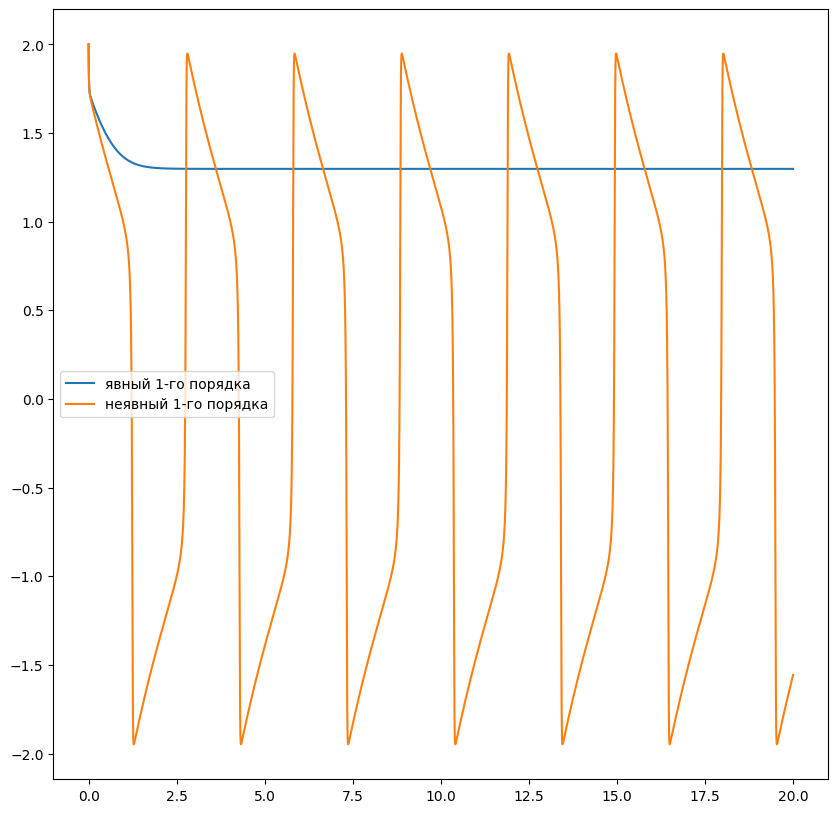

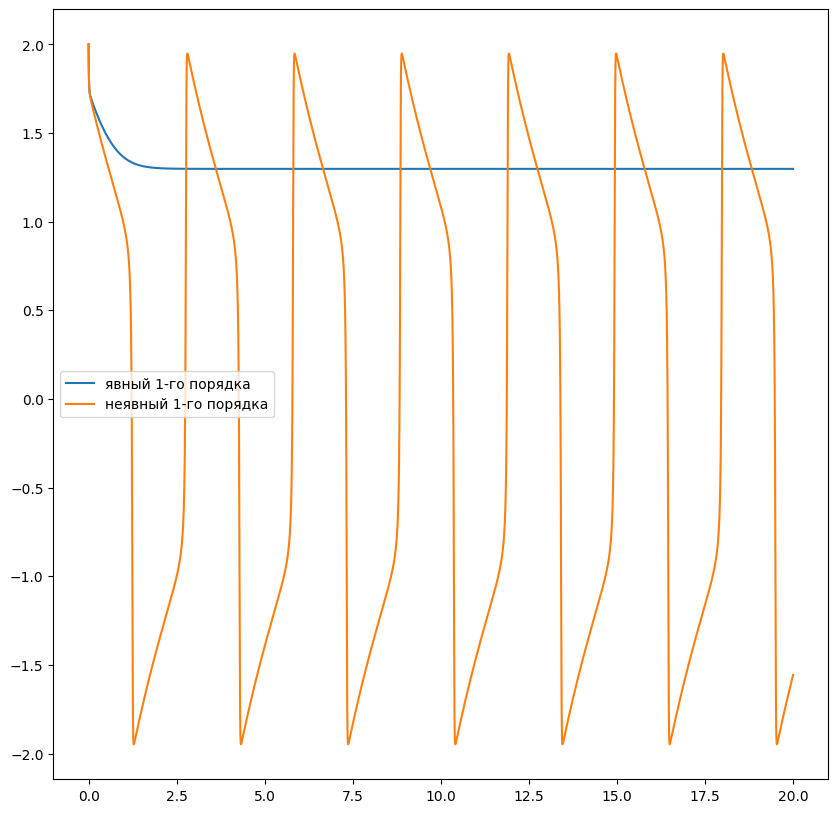

In [49]:
T = 0.0001
Tl = 0

t_start = 0
t_finish = 20 

for a in range(1, 1000, 500):
    # b /= 1000
    a = 50
    c = 0.5
    b = 1.4
    tn = t_start
    t = tn + T
    arrayx1 = [2]
    arrayy1 = [0]
    arrayx2 = [2]
    arrayy2 = [0]
    tl = [tn]
    while t <= t_finish:
        tl.append(t)
        t += T
    for i in range(1, len(tl)):
        t = tl[i]
        xvn = arrayx1[-1]
        yvn = arrayy1[-1]
        #явный метод 1-го порядка
        xn1 = T*(-a*((xvn**3)/3-xvn)+a*yvn) + xvn
        yn1 = T*(-xvn - b*yvn + c) + yvn
        arrayx1.append(xn1)
        arrayy1.append(yn1)
        #неявный
        xvn = arrayx2[-1]
        yvn = arrayy2[-1]
        xn2 = newtonsMethod(a, c, T, yvn, b, xvn)
        yn2 = (-T*xn2 + yvn)/(1+b*T)
        arrayx2.append(xn2)
        arrayy2.append(yn2)


    f = plt.figure(figsize=(10, 10))
    px1 = f.add_subplot(111)
    px1.plot(tl, arrayx1, label="явный 1-го порядка")
    px1.legend()
    px1.plot(tl, arrayx2, label="неявный 1-го порядка")
    px1.legend()
    f.show()